In [24]:
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install seaborn
%pip install scikit-learn


1889.02s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


1894.88s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


1900.65s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


1906.43s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


1912.18s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [62]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Schritt 1: CSV-Daten laden
df = pd.read_csv("./data/mmc2.csv", index_col=0, on_bad_lines='skip')

# Schritt 2: Übersicht anschauen (optional)
print(df.head())

# Schritt 3: Zellnamen herausfiltern → Nur Spalten mit ILC
ilc_columns = [col for col in df.columns if col.startswith("ILC")]

# Schritt 4: OCR-Signalmatrix extrahieren
ocr_matrix = df[ilc_columns]

ocr_matrix

               LTHSC.34-.BM  LTHSC.34+.BM  STHSC.150-.BM  MPP4.135+.BM  \
0610005C13Rik      1.096732      1.096732       1.021750      1.021812   
0610007P14Rik    206.053987    246.105317     192.424636    204.298358   
0610009B22Rik     78.272059     78.837030      68.844751     76.418169   
0610009L18Rik      8.577159     16.791386      15.511549     16.947354   
0610009O20Rik    168.645852    157.926022     155.941641    186.261464   

               proB.CLP.BM  proB.FrA.BM  proB.FrBC.BM    B.FrE.BM      B1b.PC  \
0610005C13Rik     1.205236     1.326780      1.392996    1.821243    1.025543   
0610007P14Rik   189.759175   210.195155    180.219440  137.802543  139.436719   
0610009B22Rik   106.085619    77.502817     68.213092   57.224426   56.787489   
0610009L18Rik    10.583704     8.664784      2.878172    8.952120   11.873984   
0610009O20Rik   162.584556   152.088002    163.072291  133.116083   88.052982   

                  B.T1.Sp  ...       MF.PC   MF.Fem.PC    DC.4+.Sp  

,ILC2.SI,ILC3.NKp46-CCR6-.SI,ILC3.NKp46+.SI,ILC3.CCR6+.SI
0610005C13Rik,1.577214,5.893468,1.730408,1.023171
0610007P14Rik,161.029228,106.636576,130.897955,99.948796
0610009B22Rik,34.779862,28.079826,49.131301,33.914530
0610009L18Rik,4.251744,17.007084,11.005372,5.896648
0610009O20Rik,126.369601,118.730592,147.295866,131.474014
...,...,...,...,...
Zyx,576.300606,607.717960,698.878484,807.413018
Zzef1,393.242893,302.964935,342.992528,366.763586
Zzz3,262.724615,221.522953,207.178960,259.757632
a,1.024819,1.022363,1.022767,1.023171


In [63]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ocr_matrix)

/Users/paulagutierrezposse/miniconda3/envs/data_analysis/lib/python3.9/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/paulagutierrezposse/miniconda3/envs/data_analysis/lib/python3.9/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


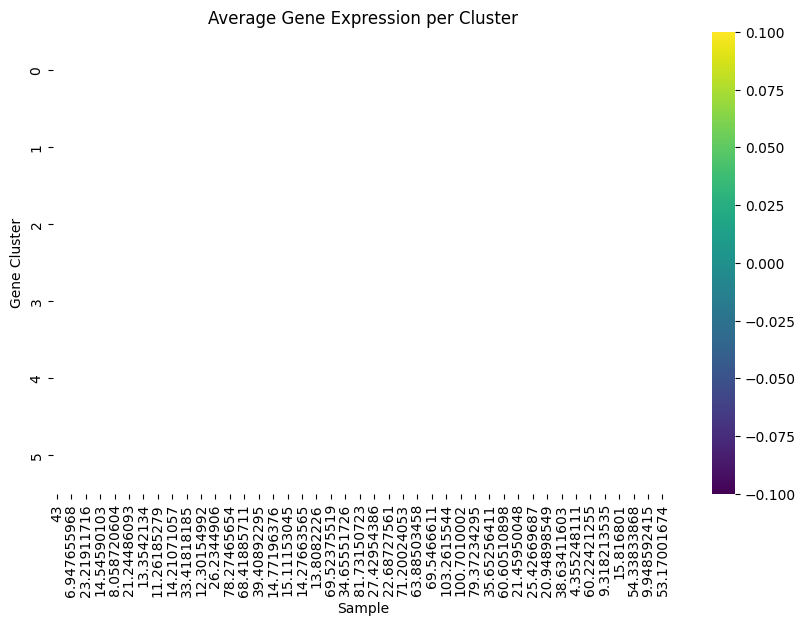

In [64]:
# 3. Run k-means clustering (you can tune the number of clusters)
k = 6  # change depending on your dataset
kmeans = KMeans(n_clusters=k, random_state=42)
gene_clusters = kmeans.fit_predict(scaled_data)

# 4. Add cluster labels back to the dataframe
filtered_df['Cluster'] = gene_clusters

# 5. Optional: visualize average expression per cluster
cluster_mean = filtered_df.groupby('Cluster').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_mean, cmap="viridis")
plt.title("Average Gene Expression per Cluster")
plt.xlabel("Sample")
plt.ylabel("Gene Cluster")
plt.show()

In [65]:
print(filtered_df['Cluster'].value_counts())

Cluster
0    14868
4     2220
3      351
1       79
5       14
2        3
Name: count, dtype: int64


In [56]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

data1 = pd.read_csv("./data/mmc2.csv", usecols = ["NK.27+11b-.BM","NK.27+11b+.BM","NK.27-11b+.BM","NK.27+11b-.Sp","NK.27+11b+.Sp","NK.27-11b+.Sp","ILC2.SI", "ILC3.NKp46-CCR6-.SI", "ILC3.NKp46+.SI", "ILC3.CCR6+.SI"])
data1.head()

,NK.27+11b-.BM,NK.27+11b+.BM,NK.27-11b+.BM,NK.27+11b-.Sp,NK.27+11b+.Sp,NK.27-11b+.Sp,ILC2.SI,ILC3.NKp46-CCR6-.SI,ILC3.NKp46+.SI,ILC3.CCR6+.SI
0,3.051690,1.024819,1.035532,1.813612,1.024105,1.024819,1.577214,5.893468,1.730408,1.023171
1,140.768939,187.195545,116.716385,165.048173,170.387372,126.914296,161.029228,106.636576,130.897955,99.948796
2,34.159718,32.793397,25.539568,38.202498,37.020735,17.225358,34.779862,28.079826,49.131301,33.914530
3,15.833752,17.859119,13.908409,9.566840,12.622775,15.210822,4.251744,17.007084,11.005372,5.896648
4,101.859183,102.006227,100.802348,97.579688,86.802320,94.228469,126.369601,118.730592,147.295866,131.474014


In [57]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1)

/Users/paulagutierrezposse/miniconda3/envs/data_analysis/lib/python3.9/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/paulagutierrezposse/miniconda3/envs/data_analysis/lib/python3.9/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


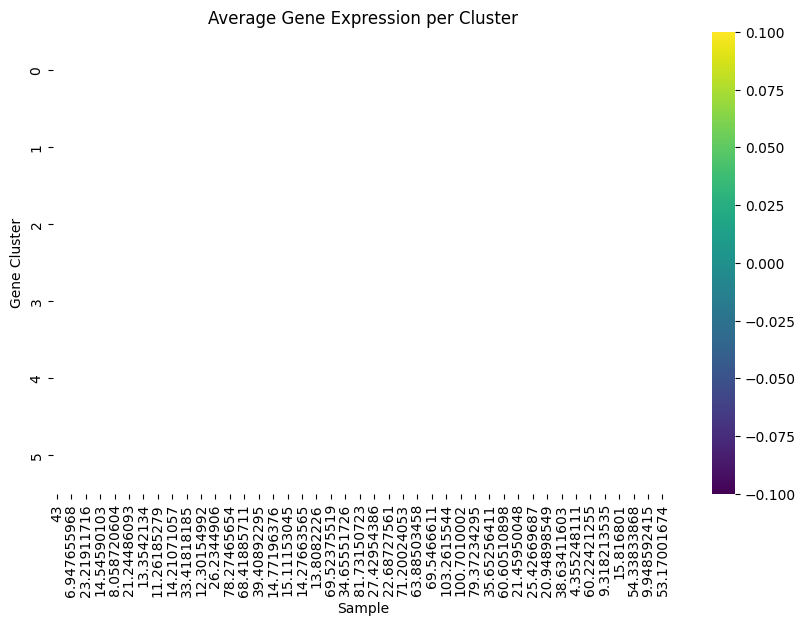

In [60]:
# 3. Run k-means clustering (you can tune the number of clusters)
k = 6  # change depending on your dataset
kmeans = KMeans(n_clusters=k, random_state=42)
gene_clusters = kmeans.fit_predict(scaled_data)

# 4. Add cluster labels back to the dataframe
filtered_df['Cluster'] = gene_clusters

# 5. Optional: visualize average expression per cluster
cluster_mean = filtered_df.groupby('Cluster').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_mean, cmap="viridis")
plt.title("Average Gene Expression per Cluster")
plt.xlabel("Sample")
plt.ylabel("Gene Cluster")
plt.show()

In [61]:
print(filtered_df['Cluster'].value_counts())

Cluster
0    15430
5     1780
2      270
1       46
3        7
4        2
Name: count, dtype: int64


In [ ]:
# Plotting the clusters 

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = load_digits().data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
df.shape

(1797, 2)

In [67]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[5 8 1 ... 1 9 6]


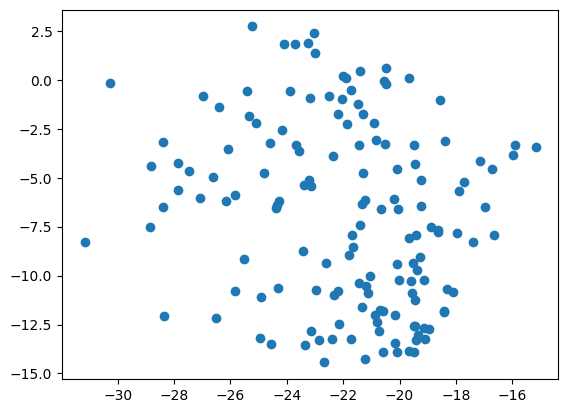

In [68]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

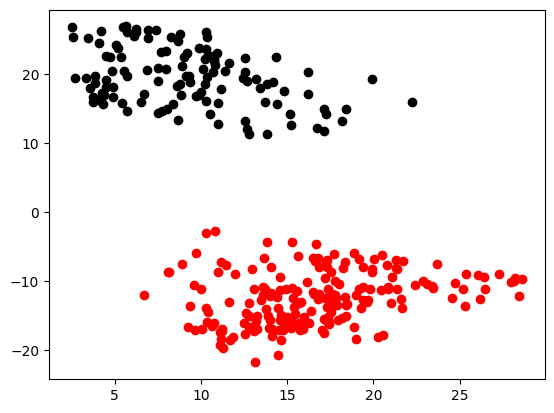

In [69]:
#filter rows of original data
filtered_label2 = df[label == 2]
 
filtered_label8 = df[label == 8]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

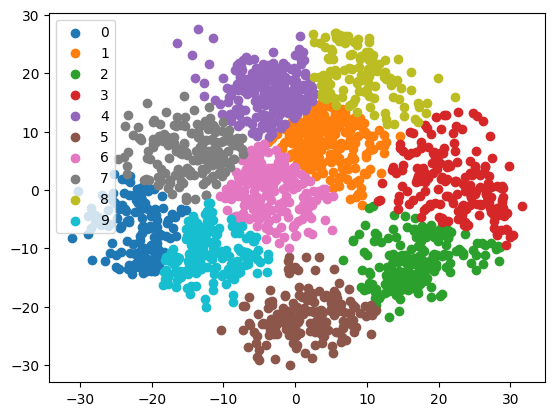

In [70]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()